In [1]:
import zipfile
import os

# Path to your zip file
zip_file_path = 'C:/Users/USER/Downloads/GUIDE_Test.csv.zip'

# Path to the directory where you want to extract the files
extract_to_path = 'C:\Cybersecurity'

# Create the extraction directory if it does not exist
os.makedirs(extract_to_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Files extracted successfully!")


Files extracted successfully!


In [3]:
import pandas as pd

# Load the dataset (use chunksize if it's large)
file_path = 'C:/Cybersecurity/GUIDE_Test.csv'
data = pd.read_csv(file_path, low_memory=False)
selected_features = ['MitreTechniques', 'Category', 'EntityType', 'LastVerdict','DetectorId', 'AlertTitle','DeviceId', 'IpAddress']

# Prepare the data subset with selected features
data_subset = data[selected_features + ['IncidentGrade']]

#data = pd.read_csv(file_path)
print("Read successfully")

Read successfully


In [7]:
data_subset.columns

Index(['MitreTechniques', 'Category', 'EntityType', 'LastVerdict',
       'DetectorId', 'AlertTitle', 'DeviceId', 'IpAddress', 'IncidentGrade'],
      dtype='object')

In [9]:
# Check the shape of the dataset
print(f"Dataset shape: {data_subset.shape}")

# Display column names and types
print(data_subset.dtypes)

# Show the first few rows
print(data_subset.head())

Dataset shape: (4147992, 9)
MitreTechniques    object
Category           object
EntityType         object
LastVerdict        object
DetectorId          int64
AlertTitle          int64
DeviceId            int64
IpAddress           int64
IncidentGrade      object
dtype: object
                   MitreTechniques           Category         EntityType  \
0      T1021;T1047;T1105;T1569.002    LateralMovement               User   
1                              NaN  CommandAndControl            Machine   
2  T1021;T1027.002;T1027.005;T1105    LateralMovement            Process   
3                  T1078;T1078.004      InitialAccess  CloudLogonSession   
4                  T1087;T1087.002          Discovery               User   

  LastVerdict  DetectorId  AlertTitle  DeviceId  IpAddress   IncidentGrade  
0  Suspicious         524         563     98799     360606  BenignPositive  
1  Suspicious           2           2      1239     360606  BenignPositive  
2  Suspicious        2932       1080

In [11]:
data_subset.isnull().sum()

MitreTechniques    2307104
Category                 0
EntityType               0
LastVerdict        3155260
DetectorId               0
AlertTitle               0
DeviceId                 0
IpAddress                0
IncidentGrade            0
dtype: int64

In [13]:
# Fill missing values in categorical columns with "Unknown"
data_subset = data_subset.copy()
data_subset['MitreTechniques'] = data_subset['MitreTechniques'].fillna('Unknown')
data_subset['LastVerdict'] = data_subset['LastVerdict'].fillna('Unknown')


In [15]:
data_subset.isnull().sum()

MitreTechniques    0
Category           0
EntityType         0
LastVerdict        0
DetectorId         0
AlertTitle         0
DeviceId           0
IpAddress          0
IncidentGrade      0
dtype: int64

In [17]:
data_subset['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    1752940
TruePositive      1492354
FalsePositive      902698
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

data_subset = data_subset.copy()  # Create a full copy of the DataFrame to avoid warnings

label_encoder = LabelEncoder()
for column in ['MitreTechniques', 'Category', 'EntityType', 'LastVerdict', 'IncidentGrade']:
    data_subset[column] = label_encoder.fit_transform(data_subset[column].astype(str))
    

data_subset['IncidentGrade'] = LabelEncoder().fit_transform(data_subset['IncidentGrade'])

C:\Users\USER\AppData\Local\Temp\ipykernel_7388\2064041309.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_subset, x='IncidentGrade', palette='viridis')


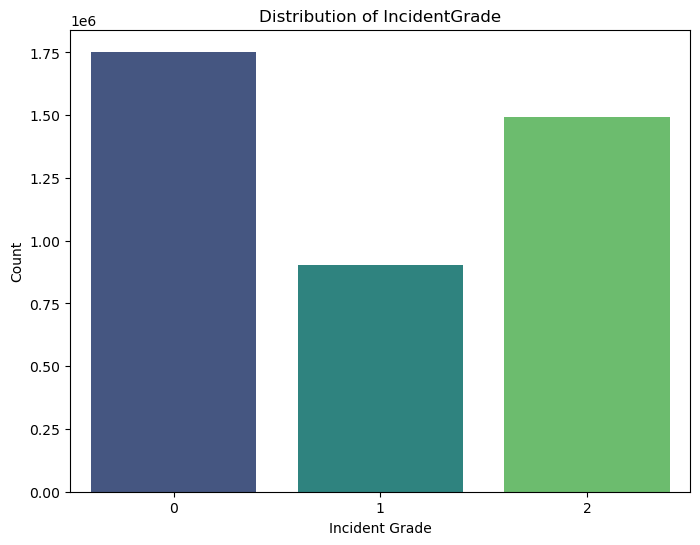

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the class distribution of IncidentGrade
plt.figure(figsize=(8, 6))
sns.countplot(data=data_subset, x='IncidentGrade', palette='viridis')
plt.title('Distribution of IncidentGrade')
plt.xlabel('Incident Grade')
plt.ylabel('Count')
plt.show()


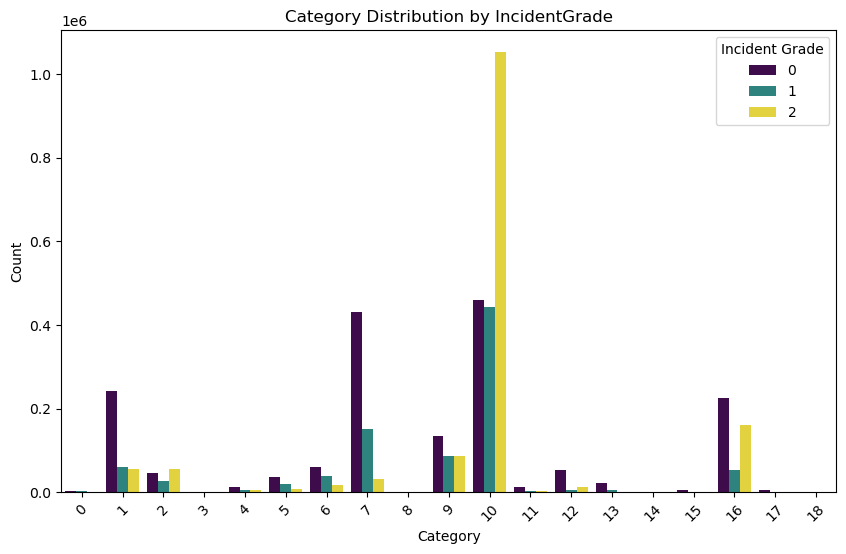

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_subset, x='Category', hue='IncidentGrade', palette='viridis')
plt.title('Category Distribution by IncidentGrade')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Incident Grade')
plt.xticks(rotation=45)
plt.show()


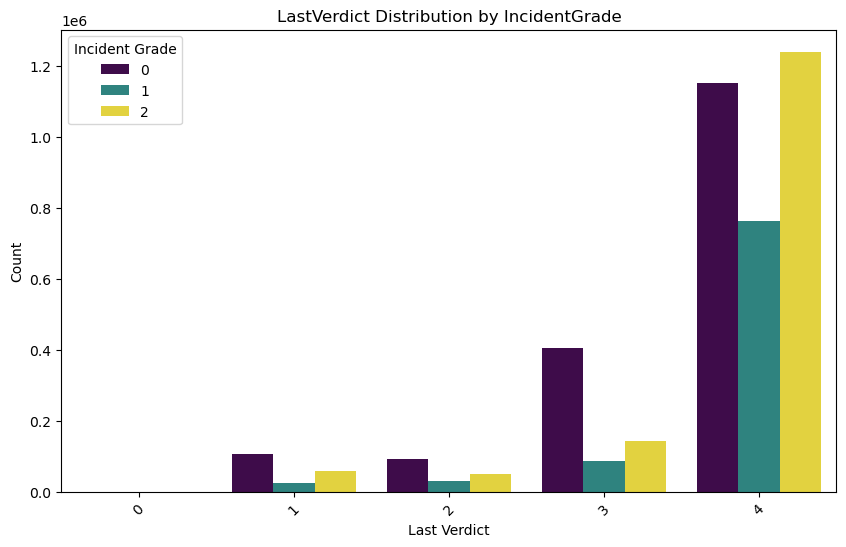

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_subset, x='LastVerdict', hue='IncidentGrade', palette='viridis')
plt.title('LastVerdict Distribution by IncidentGrade')
plt.xlabel('Last Verdict')
plt.ylabel('Count')
plt.legend(title='Incident Grade')
plt.xticks(rotation=45)
plt.show()


In [37]:
from imblearn.over_sampling import RandomOverSampler


# Separate features and target
X = data_subset.drop('IncidentGrade', axis=1)
y = data_subset['IncidentGrade']

# Initialize random oversampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


In [39]:
import pickle
# Load the trained model from file
with open('random_forest_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)


In [41]:
# Import necessary libraries
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pickle
from sklearn.metrics import classification_report, roc_auc_score



# Load the test data (assuming you have a test dataset)
X_test = X_resampled
y_test = y_resampled  # If labels are in a separate file

# Ensure preprocessing is consistent with training
# Apply any scaling, encoding, or other transformations as needed for `X_test`

# Load the trained Random Forest model
with open('random_forest_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

# Predict target values for the test set
y_test_pred = rf_model.predict(X_test)

# If you need probabilities for ROC-AUC calculation
y_test_proba = rf_model.predict_proba(X_test)

# Classification report
print("Classification Report on Test Data:\n", classification_report(y_test, y_test_pred))

# ROC-AUC Score for multi-class classification
roc_auc = roc_auc_score(y_test, y_test_proba, multi_class='ovr')
print("ROC-AUC Score on Test Data:", roc_auc)



Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.59      0.80      0.68   1752940
           1       0.74      0.49      0.59   1752940
           2       0.66      0.65      0.66   1752940

    accuracy                           0.64   5258820
   macro avg       0.66      0.64      0.64   5258820
weighted avg       0.66      0.64      0.64   5258820

ROC-AUC Score on Test Data: 0.8303879100399456
